# 20431276 ECON2023 23/24
## Question 1
### a)

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jivizcaino/PWT10.1/main/pwt101.csv'
pwt101 = pd.read_csv(url)
pwt101.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### b)

In [394]:
variables = ['country','countrycode','rgdpo','emp','avh','hc','labsh','rtfpna','cn']
pwt101_filtered = pwt101.dropna(subset=variables)
pwt101_filtered.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
354,ARG,Argentina,Argentine Peso,1954,51835.375,52254.770,18.517,7.037,2049.511,1.874,...,0.109,-0.052,-0.029,0.230,0.382,0.328,0.094,0.094,0.285,8.819
355,ARG,Argentina,Argentine Peso,1955,56628.434,56072.500,18.863,7.148,2053.407,1.889,...,0.092,-0.057,-0.034,0.231,0.372,0.328,0.110,0.106,0.276,8.312
356,ARG,Argentina,Argentine Peso,1956,58044.668,57550.316,19.206,7.244,2057.311,1.902,...,0.102,-0.050,-0.016,0.244,0.397,0.296,0.193,0.220,0.298,8.547
357,ARG,Argentina,Argentine Peso,1957,60744.988,60560.367,19.544,7.342,2061.222,1.915,...,0.101,-0.053,-0.023,0.249,0.428,0.285,0.183,0.225,0.306,8.525
358,ARG,Argentina,Argentine Peso,1958,65418.039,65162.113,19.878,7.441,2065.141,1.928,...,0.094,-0.048,-0.019,0.247,0.431,0.343,0.174,0.208,0.316,8.931


### c)

In [395]:
year_counts = pwt101_filtered.groupby('year').size()
max_year = year_counts[year_counts == year_counts.max()].index.max()
pwt101_max_year = pwt101[pwt101["year"] == max_year]


pwt101_max_year = pwt101_max_year[variables]
pwt101_cleaned = pwt101_max_year.dropna().copy()

agg_output = pwt101_cleaned['rgdpo']
emp = pwt101_cleaned['emp']
av_hours = pwt101_cleaned['avh']
human_cap = pwt101_cleaned['hc']
labour_comp = pwt101_cleaned['labsh']
tfp = pwt101_cleaned['rtfpna']
cap_stock = pwt101_cleaned['cn']

print(f'The optimal year is {max_year} with {year_counts.max()} observations')

The optimal year is 2002 with 64 observations


The line pwt101_filtered = pwt101.dropna(subset=variables)filters our subset by checking for 
missing values (Nan entries), and removes any rows where any of the specfied variables of interest 
contain a missing value. Therefore, by setting year_counts, I was able to decipher that the most 
recent year (max_year) with the maximum number of observations possible to calculate development 
accounting (using the variables of interest), is 2001.

### d)

In [396]:
#Define output_per_worker within the dataset
pwt101_cleaned['output_per_worker'] = pwt101_cleaned['rgdpo']/pwt101_cleaned['emp']
percentiles = pwt101_cleaned['output_per_worker'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.95])

us_data = pwt101_cleaned[pwt101_cleaned['countrycode'] == 'USA'].copy()
#Define the US output_per_worker
if us_data.empty:
    raise ValueError("US dataset empty")
else:
    us_data['output_per_worker'] = us_data['rgdpo']/us_data['emp']
    us_output_pw = us_data['output_per_worker'].iloc[0]

#Structure the table
country_statistics = {
    #Define the headings
    "Stat": ['Mean', 'Standard Dev', 'Min', '5th Percentile', '10th Percentile',
             '25th Percentile', 'Median', '75th Percentile', '95th Percentile', 'Max'],

    #Align the country codes with their associated statistics
    "Country Code": [
        None, None, #As there are not specific country codes that align with the mean and standard deviation of the data
        pwt101_cleaned.loc[pwt101_cleaned['output_per_worker'].idxmin(), 'countrycode'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['5%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['10%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['25%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['50%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['75%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['95%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned.loc[pwt101_cleaned['output_per_worker'].idxmax(), 'countrycode']
    ],

    #Align the country names with their associated statistics
    "Country": [
        None, None, #As there are not specific country names that align with the mean and standard deviation of the data
        pwt101_cleaned.loc[pwt101_cleaned['output_per_worker'].idxmin(), 'country'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['5%']).abs().idxmin(), 'country'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['10%']).abs().idxmin(), 'country'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['25%']).abs().idxmin(), 'country'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['50%']).abs().idxmin(), 'country'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['75%']).abs().idxmin(), 'country'],
        pwt101_cleaned.loc[(pwt101_cleaned['output_per_worker'] - percentiles['95%']).abs().idxmin(), 'country'],
        pwt101_cleaned.loc[pwt101_cleaned['output_per_worker'].idxmax(), 'country']
    ],

    #Calculate each of the required values
    "Value": [
        percentiles['mean'], percentiles['std'], percentiles['min'], percentiles['5%'],
        percentiles['10%'], percentiles['25%'], percentiles['50%'], percentiles['75%'],
        percentiles['95%'], percentiles['max']
    ],

    #Establish a column presenting the ratio to the US
    "Ratio to US": [
        percentiles['mean'] / us_output_pw, percentiles['std'] / us_output_pw,
        percentiles['min'] / us_output_pw, percentiles['5%'] / us_output_pw,
        percentiles['10%'] / us_output_pw, percentiles['25%'] / us_output_pw,
        percentiles['50%'] / us_output_pw, percentiles['75%'] / us_output_pw,
        percentiles['95%'] / us_output_pw, percentiles['max'] / us_output_pw
    ]
}

#Establish the country with the mean closest to the mean of the dataset
mean_closest = (pwt101_cleaned['output_per_worker'] - percentiles['mean']).abs().idxmin()
mean_country_code = pwt101_cleaned.loc[mean_closest,'countrycode']
mean_country = pwt101_cleaned.loc[mean_closest,'country']

#Establish the country with standard deviation closest to the standard deviation of the dataset
std_closest = (pwt101_cleaned['output_per_worker'] - percentiles['std']).abs().idxmin()
std_country_code = pwt101_cleaned.loc[std_closest,'countrycode']
std_country = pwt101_cleaned.loc[std_closest,'country']

statistics_table = pd.DataFrame(country_statistics)

#Add the 'closest' mean and standard deviation country statistics to the table
statistics_table.loc[statistics_table['Stat']=='Mean','Country Code'] = mean_country_code
statistics_table.loc[statistics_table['Stat']=='Mean','Country'] = mean_country
statistics_table.loc[statistics_table['Stat']=='Standard Dev','Country Code'] = std_country_code
statistics_table.loc[statistics_table['Stat']=='Standard Dev','Country'] = std_country

statistics_table

,Stat,Country Code,Country,Value,Ratio to US
0,Mean,SVN,Slovenia,52119.445625,0.500135
1,Standard Dev,BGR,Bulgaria,28983.180603,0.278121
2,Min,IND,India,5827.423253,0.055920
3,5th Percentile,PHL,Philippines,12189.913372,0.116974
4,10th Percentile,JAM,Jamaica,15540.556537,0.149126
5,25th Percentile,CRI,Costa Rica,27444.432953,0.263355
6,Median,CZE,Czech Republic,47548.996787,0.456277
7,75th Percentile,FIN,Finland,78990.210051,0.757984
8,95th Percentile,HKG,"China, Hong Kong SAR",99630.124091,0.956044
9,Max,NOR,Norway,106349.276321,1.020520


## e)

In [447]:
#Statistics for max year

#Filter the max year data for entries on rgdpo and emp (needed to calculate output per worker)
pwt101_cleaned_e = pwt101_max_year.dropna(subset=['rgdpo','emp']).copy()

#Redefine pwt_cleaned and percentiles based on the new restrictions
pwt101_cleaned_e['output_per_worker'] = pwt101_cleaned_e['rgdpo']/pwt101_cleaned_e['emp']
percentiles_e = pwt101_cleaned_e['output_per_worker'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.95])

us_data_e = pwt101_cleaned_e[pwt101_cleaned_e['countrycode'] == 'USA'].copy()

#Define the US output_per_worker
if us_data_e.empty:
    raise ValueError("US dataset empty")
else:
    us_data_e['output_per_worker'] = us_data_e['rgdpo']/us_data_e['emp']
    us_output_pw_e = us_data_e['output_per_worker'].iloc[0]


#Structure the table
country_statistics_e = {
    #Define the headings
   "Stat": ['Mean', 'Standard Dev', 'Min', '5th Percentile', '10th Percentile',
             '25th Percentile', 'Median', '75th Percentile', '95th Percentile', 'Max'],

    #Align the country codes with their associated statistics
    "Country Code": [
      None, None, #As there are not specific country codes that align with the mean and standard deviation of the data
        pwt101_cleaned_e.loc[pwt101_cleaned_e['output_per_worker'].idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['5%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['10%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['25%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['50%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['75%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['95%']).abs().idxmin(), 'countrycode'],
        pwt101_cleaned_e.loc[pwt101_cleaned_e['output_per_worker'].idxmax(), 'countrycode']
    ],

    #Align the country names with their associated statistics
    "Country": [
        None, None, #As there are not specific country names that align with the mean and standard deviation of the data
        pwt101_cleaned_e.loc[pwt101_cleaned_e['output_per_worker'].idxmin(), 'country'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['5%']).abs().idxmin(), 'country'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['10%']).abs().idxmin(), 'country'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['25%']).abs().idxmin(), 'country'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['50%']).abs().idxmin(), 'country'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['75%']).abs().idxmin(), 'country'],
        pwt101_cleaned_e.loc[(pwt101_cleaned_e['output_per_worker'] - percentiles_e['95%']).abs().idxmin(), 'country'],
        pwt101_cleaned_e.loc[pwt101_cleaned_e['output_per_worker'].idxmax(), 'country']
    ],

    #Recalculate each of the required values
    "Value": [
        percentiles_e['mean'], percentiles_e['std'], percentiles_e['min'], percentiles_e['5%'],
        percentiles_e['10%'], percentiles_e['25%'], percentiles_e['50%'], percentiles_e['75%'],
        percentiles_e['95%'], percentiles_e['max']
    ],

    #Establish a column presenting the ratio to the US
    "Ratio to US": [
        percentiles_e['mean'] / us_output_pw_e, percentiles_e['std'] / us_output_pw_e,
        percentiles_e['min'] / us_output_pw_e, percentiles_e['5%'] / us_output_pw_e,
        percentiles_e['10%'] / us_output_pw_e, percentiles_e['25%'] / us_output_pw_e,
        percentiles_e['50%'] / us_output_pw_e, percentiles_e['75%'] / us_output_pw_e,
        percentiles_e['95%'] / us_output_pw_e, percentiles_e['max'] / us_output_pw_e
    ]
}

#Establish the country with the mean closest to the mean of the dataset
mean_closest_e = (pwt101_cleaned_e['output_per_worker'] - percentiles_e['mean']).abs().idxmin()
mean_country_code_e = pwt101_cleaned_e.loc[mean_closest_e,'countrycode']
mean_country_e = pwt101_cleaned_e.loc[mean_closest_e,'country']

#Establish the country with standard deviation closest to the standard deviation of the dataset
std_closest_e = (pwt101_cleaned_e['output_per_worker'] - percentiles_e['std']).abs().idxmin()
std_country_code_e = pwt101_cleaned_e.loc[std_closest_e,'countrycode']
std_country_e = pwt101_cleaned_e.loc[std_closest_e,'country']

statistics_table_e = pd.DataFrame(country_statistics_e)

#Add the 'closest' mean and standard deviation country statistics to the table
statistics_table_e.loc[statistics_table_e['Stat']=='Mean','Country Code'] = mean_country_code_e
statistics_table_e.loc[statistics_table_e['Stat']=='Mean','Country'] = mean_country_e
statistics_table_e.loc[statistics_table_e['Stat']=='Standard Dev','Country Code'] = std_country_code_e
statistics_table_e.loc[statistics_table_e['Stat']=='Standard Dev','Country'] = std_country_e

statistics_table_e

,Stat,Country Code,Country,Value,Ratio to US
0,Mean,MEX,Mexico,37323.840065,0.358157
1,Standard Dev,PRT,Portugal,50089.789405,0.480658
2,Min,ETH,Ethiopia,1393.625971,0.013373
3,5th Percentile,LBR,Liberia,2727.275179,0.026171
4,10th Percentile,NGA,Nigeria,4041.464066,0.038782
5,25th Percentile,GHA,Ghana,8251.208529,0.079178
6,Median,VCT,St. Vincent and the Grenadines,22801.257143,0.218799
7,75th Percentile,SVN,Slovenia,52735.125268,0.506043
8,95th Percentile,HKG,"China, Hong Kong SAR",100930.393776,0.968521
9,Max,BMU,Bermuda,538036.054054,5.162956


## Question 2
### a)

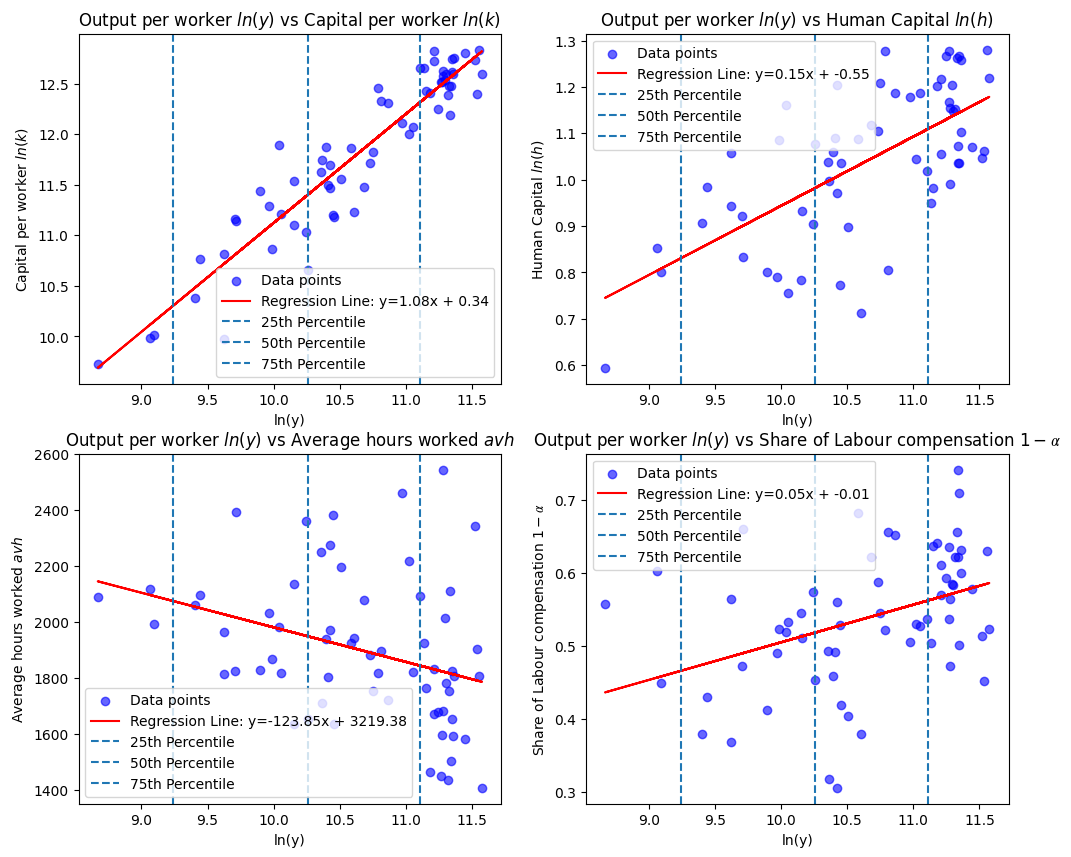

In [398]:
#Define logged variables
pwt101_cleaned['ln_output_per_worker'] = np.log(pwt101_cleaned['output_per_worker'])
pwt101_cleaned['ln_cap_per_worker'] = np.log(pwt101_cleaned['cn']/ pwt101_cleaned['emp'])
pwt101_cleaned['ln_human_cap'] = np.log(pwt101_cleaned['hc'])

#Set up the 25th, 50th, and 75th percentiles of ln(y)
percentile_25 = np.quantile(x,0.25)
percentile_50 = np.quantile(x, 0.5)
percentile_75 = np.quantile(x, 0.75)

#Set the string variables for x and y
x_var = 'ln_output_per_worker'
y_vars = {
    'ln_cap_per_worker':'Capital per worker $ln(k)$',
    'ln_human_cap': 'Human Capital $ln(h)$',
    'avh': 'Average hours worked $avh$',
    'labsh':'Share of Labour compensation $1−𝛼$'
        }

#Set up the figure with subplots
fig, axes = plt.subplots(2,2, figsize =(12,10))
axes = axes.flatten()

#Set up for loop to plot the 4 regressions
for i, (y_var, label) in enumerate(y_vars.items()):
    ax = axes[i]

    #Highlight x and y values for each plot
    x = pwt101_cleaned[x_var].values
    y = pwt101_cleaned[y_var].values

    #Use np.polyfit to fit each regression line to the plots
    b, a = np.polyfit(x,y,deg=1)

    reg_line = b*x + a

    #Plot the data, regression lines, and percentiles
    ax.scatter(x, y, color ='b', alpha = 0.6, label ='Data points')
    ax.plot(x, reg_line, color='r', label = f'Regression Line: y={b:.2f}x + {a:.2f}')
    ax.axvline(x = percentile_25, linestyle = 'dashed', label = '25th Percentile')
    ax.axvline(x = percentile_50, linestyle = 'dashed', label = '50th Percentile')
    ax.axvline(x = percentile_75, linestyle = 'dashed', label = '75th Percentile')
    ax.set_xlabel('ln(y)')
    ax.set_ylabel(label)
    ax.set_title(f'Output per worker $ln(y)$ vs {label}')
    ax.legend()
    ax.grid = True


plt.show()

### b)

Capital stock per worker $(ln(k))$ has a gradient of b = 1.08 suggests a strong, positive relation between output per worker and capital stock. $ln(k)$ shows tightly clustered points around the line of regression which indicates a strong linear relationship. This aligns with economic theory given that physical capital is a strong driver of productivity. This suggests that increasing capital stock per worker would likely increase productivity.

Human capital $(ln(h))$ has a slightly less steep slope of b = 0.15, which implies a weak, but still positive relationship. The plot shows more dispersion than that of capital stock per worker, showing a weaker trend. This may represent the more gradual, long-term nature of human capital accumulations affect on productivity

Average hours worked shows a negative regression with output per worker, with a gradient of b = -123.85. The plot shows significant scatter, showing that the relationship is weak or less stable than the prior two. The overall trend shows diminishing marginal productivity of labour as hours-worked increases. 

The plot displaying the share of labour compensation shows a very small positive slope with b = 0.05, showing a weak positive association. The relationship is relatively weak, with points relatively dispersed from the line of regression. The weak relationship suggests that variation in labour's share of income has a limited direct association with aggregate output per worker.


## Question 3
### a)

In [468]:
#Define the average share of labour compensation, the average value of labsh
av_labsh = labour_comp.mean()
alpha = 1 - av_labsh

#Define the production function y_kh
y_kh = (cap_stock/emp)**alpha * (av_hours * human_cap)**(1-alpha)
A_bar = (agg_output/ emp)/y_kh

y = A_bar * y_kh

#Define 10th and 90th percentiles of y and y_kh
y_kh_10 = np.quantile(y_kh,0.10)
y_kh_90 = np.quantile(y_kh,0.90)
y_10 = np.quantile(y,0.10)
y_90 = np.quantile(y,0.90)

#Define each success
success_1 = (np.var(np.log(y_kh)))/(np.var(np.log(y)))
success_2 = (np.var(np.log(A_bar)))/(np.var(np.log(y)))
success_3 = (np.var(np.log(tfp)))/(np.var(np.log(y)))
success_4 = (y_kh_90/y_kh_10)/(y_90/y_10)

#Define the correlation coefficient as success_5
correlation = (np.corrcoef(np.log(y_kh),np.log(y)))
success_5 = correlation[0,1]

#Create a table of results with the number of observations used
results = {
    "Measure": ["Success 1", "Success 2", "Success 3", "Success 4", "Success 5"],
    "Result": [success_1, success_2, success_3, success_4, success_5],
    "Number of observations": [len(np.log(y_kh)),len(np.log(A_bar)), len(np.log(tfp)), len(y_kh), len(y) ]
}

results_table = pd.DataFrame(results)
results_table

,Measure,Result,Number of observations
0,Success 1,0.338629,64
1,Success 2,0.259150,64
2,Success 3,0.033592,64
3,Success 4,0.452172,64
4,Success 5,0.927518,64


### b)

Another measure of success could be to calculate the correlation co-efficient between $y$ and $y_{kh}$, as seen in thetable.
This displays how closely the two factors are related, with a coefficient of close to 1 signifying a strong positive linear relationship, 
one close to 0 suggesting a negligible relationship, and one close to -1 showing a strong negaitve relationship. 
I have added the correlation coefficient to the table of measures above and named it Success 5.


$
success_5 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

Above displays the equation used to compute the correlation coefficient between the two sets of data, being the sets $y$ and $y_{kh}$ in our case. 

### c)

The first of these successes is a variance decomposition measure displaying the share of variance betweeen $ln(y)$ and $ln(y_{kh})$.
As $y_{kh}$ is comprised of physical capital, average hours worked and human capital, success_1 can be said to represent the effect of factor 
inputs on aggregate output per worker. This measure, reading as 0.338629 means that the contribution of capital and labour inputs to output 
per worker explains about 34% of the variance in income per worker. While this is a significant proportion, it means that there is still roughly 66% of income differences going unexplained, most likely accounted for by other factors like total factor productivity (TFP).

The result of Success 2 displays the share of variance in $ln(y)$ explained by the $ln(tfp)$, the log of the residual A_bar. 
The measure of 0.259150 implies that the variance of A_bar explains roughly 26% of the variance of income per-worker. This cements TFP as a meaningful driver of income per worker differences, yet not by as much as the factors of production.

Success 3 shows us the share of the variance in $ln(y)$ that is explained by the residual tfp from pwt101, which comes out to roughly 3.4%.
This is a much lower value than that of success_2, suggesting that the Total Factor Productivity data from pwt101 contributes relatively little to output per worker.

Success 4 gives us a share of inter-percentile differentials for $y$ and $y_{kh}$. The result of 0.452172 suggests that $y_{kh}$ accounts for roughly 45% of the variation between the 90th and 10th percentiles of income per worker, thus suggesting that measurable factors of production explain almost half of the income disparity between richer and poorer economies. This details the weight factors of production have in driving inequality. 

Success 5 gives the correlation coefficient between $y$ and $y_{kh}$, as described above. The value of 0.927518 shows a very strong positive relationship between $y$ and $y_{kh}$. This high correlation implies that factors of production are crucial determinants of output changes, even if they are not the sole determinants.

## Question 4
### a)

In [471]:
#Define logged avh*hc
pwt101_cleaned['ln_avh_hc'] = np.log(pwt101_cleaned['avh']*pwt101_cleaned['hc'])

#Define the variance decomposition as follows
term_1 = alpha **2 * (pwt101_cleaned['ln_cap_per_worker']).var()
term_2 = (1-alpha)**2 * np.log(av_hours * human_cap).var()
term_3_cov = pwt101_cleaned[['ln_cap_per_worker','ln_avh_hc']].cov().iloc[0,1]
term_3 = 2*alpha*(1-alpha)*term_3_cov

#Determine the share of the variance accounted for by each of the terms and construct the table
shares = {
    "Term": ["Term 1", "Term 2", "Term 3", "Total"],
    "Value": [term_1, term_2, term_3, term_1 + term_2 + term_3],
    "Share": [term_1/(np.log(y_kh)).var(),term_2/(np.log(y_kh)).var(),term_3/(np.log(y_kh)).var(), 
              (term_1/(np.log(y_kh)).var() + term_2/(np.log(y_kh)).var() + term_3/(np.log(y_kh)).var())]
}

shares_table = pd.DataFrame(shares)
shares_table

,Term,Value,Share
0,Term 1,0.141395,0.828243
1,Term 2,0.007226,0.042328
2,Term 3,0.022096,0.129429
3,Total,0.170717,1.000000


### b)

From this set of results we can deduce that Term 1 has by far the largest impact on the variance of $ln(y_{kh})$, accounting for around 83% of the measure. The other two terms therefore have a relatively small effect on $var(ln(y_{kh}))$, with terms 2 and 3 contributing 4.2% and 13% respectively.

Term 1, describing the impact of capital stock per worker, is by far the most impactful driver on the variance of $ln(y_{kh})$, accounting for roughly 83%. This is consistent with the fact that physical capital is a primary driver of productivity.

Term 2 describes the combined effect of average hours worked and human capital and accounts for around 4.23% of the variance. One can deduce that this lower impact could be due to factors like lower human capital accumulation rates or diminishing returns to additional hours worked.

Term 3 describes the covariance between physical capital with human capital and average hours worked. The term accounts for around 12.9% of the variance, suggesting there is a notable interaction between capital and labour inputs. This suggests that economies with higher capital levels also tend to have higher human capital or more hours worked, but it is still not as strong as the effect of capital stock.

## Question 5

The results from this study suggest that factor accumulation explains a large portion of income disparities and therefore standards of living. The 34% that it accounts for, shown by success 1, is comparable to the Caselli's result of 39% using the same measure. This validates my findings for success 1 and means that factor accumulation can be said to have a significant effect on standard of living differences across countries. However, this also suggests that factor accumulation does not hold the majority of impact on income disparities, and so further investigation is required to decipher what other factors there are that explain significant proportions of the variance.

Success 2 helps to highlight the importance of Total Factor Productivity (TFP) in explaining differences in income per worker, revealing that it accounts for 26% of the variance. This highlights that efficiency in the use of factors of production also plays a crucial role in determining standards of living but again, it does not hold the majority. These two findings suggest that there is around 40% of the variance in income distribution that is yet to be explained by either factor accumulation or efficiency (TFP). This is likely due to various other factors including depreciation of capital stock. 

It is important to note that Caselli (2005)$_1$ puts a heavier weight on the importance of TFP, stating that it accounts for around 50% of variance in incomes. My results show a more balanced weight placed on factor accumulation and TFP, though the importance of physical capital still aligns with the findings found in Caselli. 

The interpretations of my results also vary dependent on the measure of success used. Success 4 emphasizes the contribution of factor accumulation, showing that $y_{kh}$ accounts for 45% of the income disparity between the 10th and 90th percentiles. 
The variance decomposition from Q4 helps us to determine physical capital stock per worker as the most important factor, accounting for 83% of the variance. This also aligns with success 5, which shows a very strong correlation between $y$ and $y_{kh}$.


## Question 6

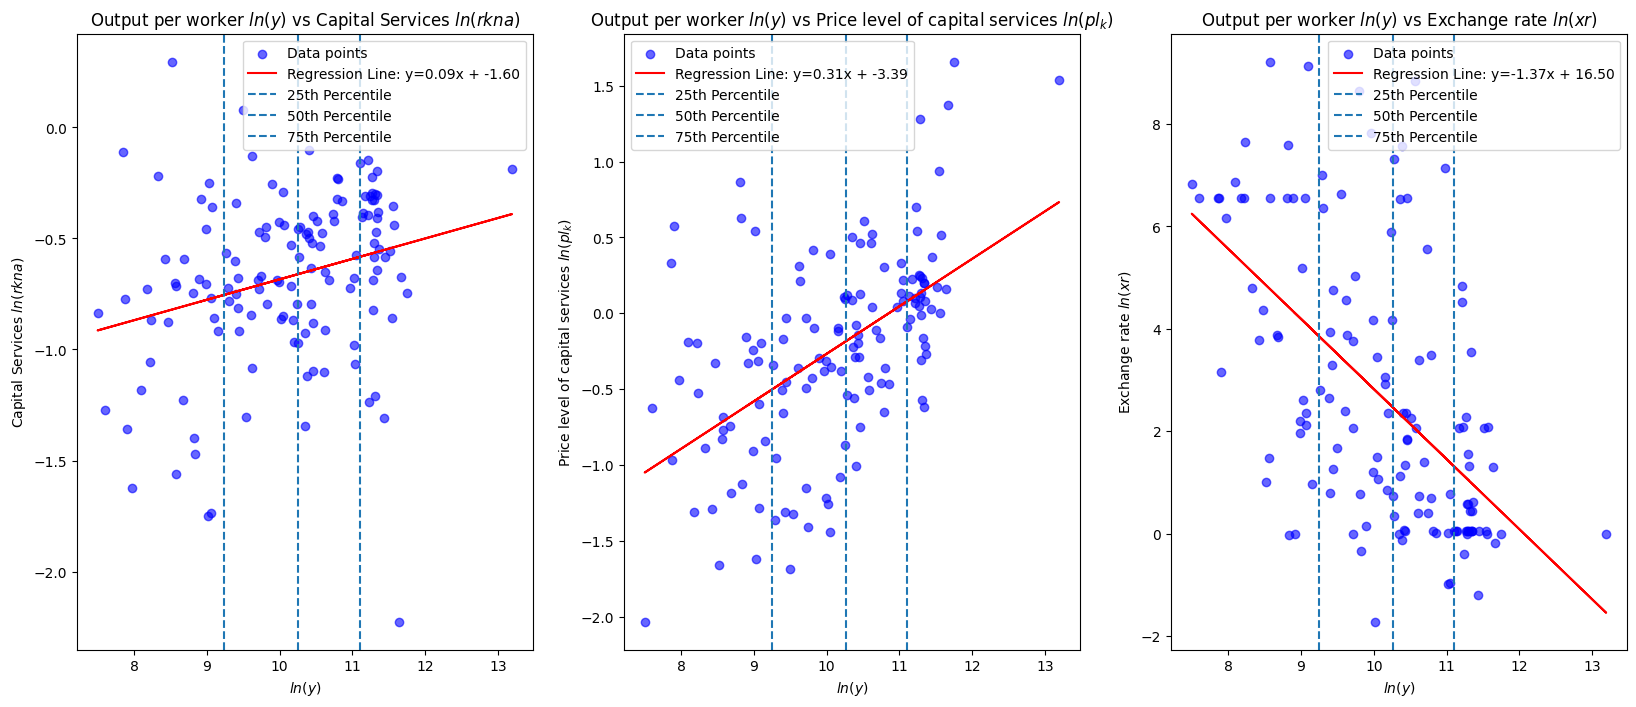

,Measure,Result,Number of observations
0,Success 6,0.123065,137
1,Success 7,0.348249,137


In [472]:
#Establish a new set of variables and pwt101_cleaned_6
variables_6 = ['rgdpo','emp','xr','rkna','pl_k']
pwt101_max_year_6 = pwt101[pwt101["year"] == 2002][variables_6].dropna()
pwt101_cleaned_6 = pwt101_max_year_6.copy()

pwt101_cleaned_6['ln_output_per_worker'] = np.log(pwt101_cleaned_6['rgdpo']/pwt101_cleaned_6['emp'])
pwt101_cleaned_6['ln_exchange_rate'] = np.log(pwt101_cleaned_6['xr'])
pwt101_cleaned_6['ln_capital_services'] = np.log(pwt101_cleaned_6['rkna'])
pwt101_cleaned_6['ln_pl_capital_services'] = np.log(pwt101_cleaned_6['pl_k'])

#Set the string variables for x and y
x_var_6 = 'ln_output_per_worker'
y_vars_6 = {
    'ln_capital_services': 'Capital Services $ln(rkna)$',
    'ln_pl_capital_services':'Price level of capital services $ln(pl_k)$',
    'ln_exchange_rate':'Exchange rate $ln(xr)$',
        }

#Set up the figure with subplots
fig, axes = plt.subplots(1,3, figsize =(20,8))
axes = axes.flatten()

#Set up for loop to plot the 4 regressions
for i, (y_var_6, label) in enumerate(y_vars_6.items()):
    ax = axes[i]

    #Highlight x and y values for each plot
    x = pwt101_cleaned_6[x_var_6].values
    y = pwt101_cleaned_6[y_var_6].values

    #Use np.polyfit to fit each regression line to the plots
    b, a = np.polyfit(x,y,deg=1)

    reg_line = b*x + a

    #Plot the data, regression lines, and percentiles
    ax.scatter(x, y, color ='b', alpha = 0.6, label ='Data points')
    ax.plot(x, reg_line, color='r', label = f'Regression Line: y={b:.2f}x + {a:.2f}')
    ax.axvline(x = percentile_25, linestyle = 'dashed', label = '25th Percentile')
    ax.axvline(x = percentile_50, linestyle = 'dashed', label = '50th Percentile')
    ax.axvline(x = percentile_75, linestyle = 'dashed', label = '75th Percentile')
    ax.set_xlabel('$ln(y)$')
    ax.set_ylabel(label)
    ax.set_title(f'Output per worker $ln(y)$ vs {label}')
    ax.legend()
    ax.grid = True
    
plt.show()

#Avoid dividing by Nan values
y = pwt101_cleaned_6[x_var_6].values 
y = y[~np.isnan(y)]

success_6 = (np.var(pwt101_cleaned_6['ln_capital_services']))/(np.var(y))
success_7 = (np.var(pwt101_cleaned_6['ln_pl_capital_services']))/(np.var(y))

#Create a table of results with the number of observations used
results_6 = {
    "Measure": ["Success 6", "Success 7"],
    "Result": [success_6, success_7],
    "Number of observations": [len(pwt101_cleaned_6['ln_exchange_rate']), len(pwt101_cleaned_6['ln_pl_capital_services'])]
}

results_table_6 = pd.DataFrame(results_6)
results_table_6

I decided to further analyse differences in income per worker by examining capital services, namely capital services at constant 2017 national prices $(rkna)$, and the price level of capital services $p_{-}lk$. Higher capital services indicate the use of technologically advanced equipment and infrastructure by delving into the efficiency and effectiveness of physical capital. Hence, study of these builds upon the existing study by not only putting focus on the $quantity$ of physical capital but also including how it is utilised in practice.

The two regressions plotted above both show a positive relation between output per worker and capital services/price level of capital services respectively. The slope of b = 0.09 in the capital services plot shows a relatively weak relation, and therefore implies that variations in capital services contribute only modestly to differences in income per worker. The price level of capital services, with b = 0.31, suggests a much stronger relation between disparities in price level and income per worker. The data points are slightly dispersed which slightly weakens the trend but doesn't diminish the solidarity of the results shown. 

The variance ratio statistics give a further insight into the effect of these two variables on income per worker. They suggest that 12.3% of the variance in $ln(y)$ is accounted for by $rkna$ and around 35% of the variance is accounted for by $pl_-k$. Thus, differences in capital services have a notable impact on disparities in income disparities. 

This analysis provides an insight into how we can brigde the gap that we currently have left between TFP and factor accumulation. Capital services provide a nuanced explanation of technologies role in productivity, particularly in countries where TFP is low. 

I extended my study of other variables by also including a regression on exchange rate. Here, there is a strong negative correlation seen between the two variables, suggesting that countries with higher output per worker tend to have lower exchange rates (stronger currencies in terms of purchasing power). There is a fair amount of dispersion surrounnding the regression line yet the trend is still clear. An interpretation of this could be that stronger currencies (lower $ln(xr)$) may reflect economies with higher productivity and capital stock, in turn contributing to higher $ln(y)$. This highlights exchange rates as a worthy factor to consider when discussing income disparities by providing insights useful for effective policy making. It is clear that by exacting specific exchange rate regimes, governments may be able to boost income per worker.

## Question 7

The analysis in this study reflects that while factor accumulation (physical and human capital) and TFP are significant dictators of income inequalities, neither one accounts for the majority of the variance in income per worker. Factor accumulation accounts for around 34% and TFP accounts for around 26%, with 64 country observations contributing to the calculation of each statistic. The 40% of variance that is unaccounted for therefore likely suggests the presence of other determinants. Furthermore, the analysis of capital services highlights the importance of not only the quantity of capital, but its price level and how it is used. It shows that the disparities in how efficiently capital is used across economies is crucial to understanding productivity and differences in income per worker as a result.

In terms of policy implications, this study could be extrapolated in various ways. The first is by encouraging a boosting of capital stock per worker by promoting investment in infrastructure, technology and machinery. This is likely most achievable by prioritising foreign direct investment (FDI) within government policy. This idea is present in the World Bank Discussion Papers (1993)$_2$, highlighting the role of FDI in stimulating economic growth through the provision of access to capital, technology, and expertise. The paper points to positive spill-over effects of a boost in FDI into local economies, including diffusion of innovation, development of skills, and provision of access to global supply chains. These spill-over effects allow for enhanced integration of local economies into international markets, invariably leading to boosted revenue and growth for firms and industries alike. 

The second take-away is for countries, particularly low-income countries, to invest in human capital. Although its direct contribution to income disparities seems modest, human capital has long-term potential to boost economic growth and efficiency. Hartog and Maassen van den Brink (2007)$_3$ emphasize schooling as a form of human capital, directly relating years in education to income differentials. The paper provides a framework for understanding how human capital accumulation leads to improved economic outcomes, a result that is mirrored in my study. 

In addition to the study of factor accumulation and TFP, my study ventures towards capital services as a potential explanation of the unaccounted variance in incomes. Performing a variance ratio test concluded that the price level of capital services contributes to a strong 35% of income variance, underlining the importance of capital costs in determining productivity differences. Moreover, the analysis of exchange rates provides a deeper insight into the topic. Alfaro et.al (2017)$_4$ give a detailed, evidence based discussion as to the impacts of depreciations on productivity, with some of their findings resembling my findings. However, they argue that by increasing the costs of importing intermediate goods, a weakening of a currency can widely lead to loss of productivity across economies, a result that directly questions the solidarity of my findings. 

Future research could assess the interactions between the variables used in this study to allow for the creation of holistic strategies that diminish income disparities and boost economic growth.


## Bibliography

1. CASELLI, F. 2005. ACCOUNTING FOR CROSS-COUNTRY INCOME DIFFERENCES. Handbook of Economic Growth, Volume 1A.
2. KESSIDES, C. 1993. THE CONTRIBUTIONS OF INFRASTRUCTURE TO ECONOMIC DEVELOPMENT. World Bank Discussion Papers
3. HARTOG, J. MAASSEN VAN DE BRINK, H. HUMAN CAPITAL. Cambridge University Press
4. ALFARO, L. CUÑAT, A. FADINGER, H. LIU, Y. 2017. THE REAL EXCHANGE RATE, INNOVATION, AND PRODUCTIVITY. Harvard Business School